# OBJECTIVE: Confirm Julia framework and Base speed

In [1]:
using Pkg
Pkg.activate(".") #activating the local Package environment, for this Session

##adding packages used in this Session

  Activating new project at `C:\Users\Janelle`


# KR1: Use @code_* to examine a simple function. The * is replaceable by native, typed, warntype, and others. Discover them. 

In [7]:
 @code_native 5^3


	.text
	.file	"^"
	.globl	"julia_^_1928"                  # -- Begin function julia_^_1928
	.p2align	4, 0x90
	.type	"julia_^_1928",@function
"julia_^_1928":                         # @"julia_^_1928"
; ┌ @ intfuncs.jl:299 within `^`
	.cfi_startproc
# %bb.0:                                # %top
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset %rbp, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register %rbp
	subq	$32, %rsp
	movabsq	$j_power_by_squaring_1930, %rax
	callq	*%rax
	addq	$32, %rsp
	popq	%rbp
	retq
.Lfunc_end0:
	.size	"julia_^_1928", .Lfunc_end0-"julia_^_1928"
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


In [8]:
 @code_typed 5^3

CodeInfo(
1 ─ %1 = invoke Base.power_by_squaring(x::Int64, p::Int64)::Int64
└──      return %1
) => Int64

In [9]:
 @code_warntype 5^3

MethodInstance for ^(::Int64, ::Int64)
  from ^(x::T, p::T) where T<:Integer in Base at intfuncs.jl:299
Static Parameters
  T = Int64
Arguments
  #self#::Core.Const(^)
  x::Int64
  p::Int64
Body::Int64
1 ─ %1 = Base.power_by_squaring(x, p)::Int64
└──      return %1



In [10]:
@code_warntype 5.0^3.0

MethodInstance for ^(::Float64, ::Float64)
  from ^(x::Float64, y::Float64) in Base.Math at math.jl:998
Arguments
  #self#::Core.Const(^)
  x::Float64
  y::Float64
Locals
  yint::Int64
Body::Float64
1 ──       nothing
│          (yint = Base.Math.unsafe_trunc(Base.Math.Int, y))
│    %3  = (y == yint)::Bool
└───       goto #3 if not %3
2 ── %5  = (x ^ yint)::Float64
└───       return %5
3 ── %7  = Base.Math.eps()::Core.Const(2.220446049250313e-16)
│    %8  = Base.Math.inv(%7)::Core.Const(4.503599627370496e15)
│    %9  = (2 * %8)::Core.Const(9.007199254740992e15)
│    %10 = (y >= %9)::Bool
└───       goto #5 if not %10
4 ── %12 = Base.Math.typemax(Base.Math.Int64)::Core.Const(9223372036854775807)
│    %13 = (%12 - 1)::Core.Const(9223372036854775806)
│    %14 = (x ^ %13)::Float64
└───       return %14
5 ── %16 = (x < 0)::Bool
└───       goto #9 if not %16
6 ── %18 = (y > -4.0e18)::Bool
└───       goto #8 if not %18
7 ──       Base.Math.throw_exp_domainerror(x)
└───       Core.Const(:(goto

Now given a function func(x):

In [11]:
function func(x)
    if x < 5
        return 0
    end
    return x
end

func (generic function with 1 method)

In [12]:
@show func(4.1)
@show typeof(func(4.1));

func(4.1) = 0
typeof(func(4.1)) = Int64


In [13]:
@show func(6.3)
@show typeof(func(6.3));

func(6.3) = 6.3
typeof(func(6.3)) = Float64


In [14]:
@code_warntype func(6.3)

MethodInstance for func(::Float64)
  from func(x) in Main at In[11]:1
Arguments
  #self#::Core.Const(func)
  x::Float64
Body::Union{Float64, Int64}
1 ─ %1 = (x < 5)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x



In [15]:
@code_warntype func(-π)

MethodInstance for func(::Float64)
  from func(x) in Main at In[11]:1
Arguments
  #self#::Core.Const(func)
  x::Float64
Body::Union{Float64, Int64}
1 ─ %1 = (x < 5)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x



In [18]:
function newfunc(x)
    if x < 5
        return zero(typeof(x))
    end
    return x
end

newfunc (generic function with 1 method)

In [19]:
@code_warntype newfunc(-π)

MethodInstance for newfunc(::Float64)
  from newfunc(x) in Main at In[18]:1
Arguments
  #self#::Core.Const(newfunc)
  x::Float64
Body::Float64
1 ─ %1 = (x < 5)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.typeof(x)::Core.Const(Float64)
│   %4 = Main.zero(%3)::Core.Const(0.0)
└──      return %4
3 ─      return x



# KR2: Demonstrate that Julia is able to determine constants in codes. 

In [31]:
@inline func(x) = log(10.0)*x 

func (generic function with 1 method)

In [32]:
func(2)

4.605170185988092

In [33]:
@code_llvm func(4.0)

;  @ In[31]:1 within `func`
; Function Attrs: uwtable
define double @julia_func_2579(double %0) #0 {
top:
; ┌ @ float.jl:385 within `*`
   %1 = fmul double %0, 0x40026BB1BBB55516
; └
  ret double %1
}


In [34]:
@code_typed func(4.0)

CodeInfo(
1 ─ %1 = Base.mul_float(2.302585092994046, x)::Float64
└──      return %1
) => Float64

In [35]:
func1(x) = x*log(x)*f(x)

func1 (generic function with 1 method)

In [36]:
@code_llvm func1(4.0)

;  @ In[35]:1 within `func1`
; Function Attrs: uwtable
define nonnull {}* @julia_func1_2612(double %0) #0 {
top:
  %1 = alloca [2 x {}*], align 8
  %gcframe9 = alloca [4 x {}*], align 16
  %gcframe9.sub = getelementptr inbounds [4 x {}*], [4 x {}*]* %gcframe9, i64 0, i64 0
  %.sub = getelementptr inbounds [2 x {}*], [2 x {}*]* %1, i64 0, i64 0
  %2 = bitcast [4 x {}*]* %gcframe9 to i8*
  call void @llvm.memset.p0i8.i32(i8* noundef nonnull align 16 dereferenceable(32) %2, i8 0, i32 32, i1 false)
  %3 = call {}*** inttoptr (i64 1699154720 to {}*** ()*)() #4
; ┌ @ special/log.jl:267 within `log`
   %4 = bitcast [4 x {}*]* %gcframe9 to i64*
   store i64 8, i64* %4, align 16
   %5 = getelementptr inbounds [4 x {}*], [4 x {}*]* %gcframe9, i64 0, i64 1
   %6 = bitcast {}** %5 to {}***
   %7 = load {}**, {}*** %3, align 8
   store {}** %7, {}*** %6, align 8
   %8 = bitcast {}*** %3 to {}***
   store {}** %gcframe9.sub, {}*** %8, align 8
   %9 = call double @j__log_2614(double %0, {}* inttoptr 

  store {}* %18, {}** %.sub, align 8
  %23 = call nonnull {}* @ijl_apply_generic({}* nonnull %15, {}** nonnull %.sub, i32 1)
; ┌ @ operators.jl:591 within `*` @ float.jl:385
   %24 = fmul double %9, %0
   store {}* %23, {}** %22, align 16
; │ @ operators.jl:591 within `*`
   %ptls_load81314 = load i8*, i8** %17, align 8
   %25 = call noalias nonnull {}* @ijl_gc_pool_alloc(i8* %ptls_load81314, i32 1392, i32 16) #5
   %26 = bitcast {}* %25 to i64*
   %27 = getelementptr inbounds i64, i64* %26, i64 -1
   store atomic i64 268442464, i64* %27 unordered, align 8
   %28 = bitcast {}* %25 to double*
   store double %24, double* %28, align 8
   store {}* %25, {}** %16, align 8
   store {}* %25, {}** %.sub, align 8
   %29 = getelementptr inbounds [2 x {}*], [2 x {}*]* %1, i64 0, i64 1
   store {}* %23, {}** %29, align 8
   %30 = call nonnull {}* @ijl_apply_generic({}* inttoptr (i64 271405248 to {}*), {}** nonnull %.sub, i32 2)
   %31 = load {}*, {}** %5, align 8
   %32 = bitcast {}*** %3 to {}**

# KR3: Demonstrate Julia's type-inference and multiple dispatch.

In [38]:
what(x) = "(generic) some type $(typeof(x))" #most general case
what(x::String) = "a string"
what(x::Number) = "a number"
what(x::Real) = "a real number"
what(x::Rational) = "a rational number"
what(x::Int) = "an integer"
what(x::Complex) = "a complex number"

what (generic function with 7 methods)

In [39]:
println("π is $(what(π)).")
println("4.0 is $(what(4.0)).")
println("4 is $(what(4)).")
println("\"x\" is $(what("x")).")
println("\'x\' is $(what('x')).")
println("4+2im is $(what(4+2im)).")

π is a real number.
4.0 is a real number.
4 is an integer.
"x" is a string.
'x' is (generic) some type Char.
4+2im is a complex number.


#  KR3: Show the difference, if any, between your own sum function my_sum(x::Vector) and @time. Use a for-loop for your customized sum function.

In [40]:
function my_sum(x::Vector)
    s = zero(eltype(x)) ##important to use consistent zero type, eltype()=?
    for i in 1:length(x)
        s += x[i]
    end
    return s
end

my_sum (generic function with 1 method)

In [41]:
x = rand(10_000_000);
@time my_sum(x)

  0.048114 seconds (13.17 k allocations: 736.115 KiB, 39.18% compilation time)


5.00048185025142e6

In [42]:
@time my_sum(x)

  0.014541 seconds (1 allocation: 16 bytes)


5.00048185025142e6

In [46]:
?sum(::Array)

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


See also: [`reduce`](@ref), [`mapreduce`](@ref), [`count`](@ref), [`union`](@ref).

# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```


In [47]:
sum(1:20; init = 0.0)

210.0

In [49]:
A = [1 2; 3 4];

sum(A, dims=1)




1×2 Matrix{Int64}:
 4  6

In [50]:
@time sum(x) #using the Base.sum(::Vector) function


  0.235825 seconds (277.36 k allocations: 15.197 MiB, 91.22% compilation time)


5.000481850251821e6

In [51]:
tmy = @elapsed my_sum(x);
tbs = @elapsed sum(x);
@show tmy/tbs

tmy / tbs = 2.0945208297074505


2.0945208297074505

# KR4: Replicate plotting the Mandelbrot. Use a separate file Mandelbrot.jl to contain the function code. Use include() function to load the file.

In [56]:
include("Mandelbrot.jl")

mandel (generic function with 1 method)

In [154]:
include("PlotMandelbrot.jl")


mandel (generic function with 4 methods)

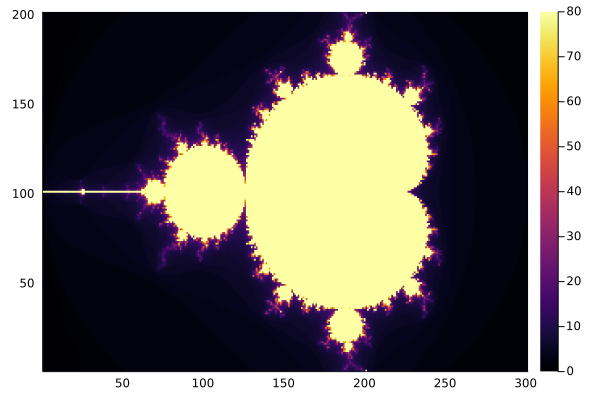

In [155]:
heatmap([mandel(x,y) for y = -1:0.01:1, x = -2:0.01:1, N=80])

# KR5: Plot of the time it takes for the function to run using @time macro for the given grid size n

In [157]:
include("PlotMandelbrot.jl")
@time[mandel(x,y) for y = -1:0.01:1, x = -2:0.01:1]


  0.068623 seconds (125.15 k allocations: 6.330 MiB, 80.22% compilation time)


201×301 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0   